# King County - analiza i klasterovanje

## Ucitavanje dataseta

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "ticks", color_codes = True)

In [0]:
url="https://raw.githubusercontent.com/hajdeger/AOP_PUB/master/kc_house_data.csv"
df = pd.read_csv(url)

## Ciscenje

In [33]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [0]:
df = df.drop(['id'], axis=1)

In [35]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [36]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
price_values = df.pop('price')
df['price'] = price_values

In [39]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


In [0]:
df = df.drop(['date'], axis=1)

## Klastering

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2019)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
x = df
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cs = pd.DataFrame(x_scaled,columns=df.columns)

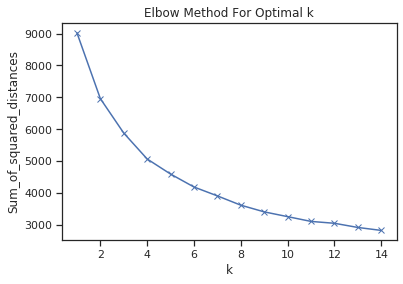

In [45]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cs)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
np.random.seed(0)
msk = np.random.rand(len(df_cs)) < 0.8
train = df_cs[msk]
test = df_cs[~msk]

In [0]:
X = np.array(train)
X_test = np.array(test)

In [0]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

In [0]:
y_k = kmeans.predict(X_test)

In [50]:
test["PREDICTED_CLUSTER"] = y_k

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_summary = test.groupby(by='PREDICTED_CLUSTER').mean()

In [52]:
train_summary = test.groupby(by='PREDICTED_CLUSTER').mean()
train_summary = train_summary[['bedrooms', 'bathrooms', 
                               'sqft_living','sqft_lot', 
                               'floors', 
                              'waterfront','view', 
                               'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']]
train_summary

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
PREDICTED_CLUSTER,,,,,,,,,,,,,,,,,,,
0,0.108120,0.314528,0.150446,0.012950,0.393915,0.000000,0.013692,0.528398,0.570656,0.212926,0.010689,0.854696,0.000000,0.195013,0.358635,0.323438,0.305398,0.019482,0.038965
1,0.097369,0.220754,0.105293,0.012493,0.015598,0.000000,0.018631,0.666811,0.503033,0.120745,0.060982,0.607113,0.000000,0.177590,0.358207,0.281361,0.220362,0.017136,0.027885
2,0.093505,0.190353,0.095575,0.004394,0.016573,0.000000,0.024579,0.554073,0.491924,0.100614,0.072358,0.474402,0.000000,0.723549,0.708044,0.159447,0.206193,0.007732,0.041202
3,0.097606,0.207484,0.108464,0.002994,0.143478,0.000000,0.024909,0.746377,0.506492,0.119859,0.071378,0.204222,0.000000,0.594121,0.771415,0.157094,0.215363,0.005254,0.066239
4,0.113238,0.339927,0.197494,0.012121,0.398862,0.000000,0.016358,0.531294,0.655524,0.272666,0.026990,0.843107,0.000000,0.216238,0.767440,0.366306,0.398579,0.020619,0.089437
5,0.104278,0.274816,0.145199,0.008960,0.209412,0.047059,0.127941,0.555882,0.550980,0.169523,0.078389,0.354322,0.989926,0.468538,0.664130,0.213279,0.265106,0.013676,0.082428
6,0.093787,0.314333,0.113810,0.001524,0.524022,0.000000,0.011872,0.508380,0.580540,0.145349,0.037844,0.908428,0.000000,0.633994,0.750764,0.150093,0.200491,0.003104,0.058341
7,0.113740,0.342751,0.215335,0.016256,0.200913,0.136986,0.740868,0.625571,0.643836,0.220036,0.175614,0.612150,0.004539,0.478207,0.655979,0.222106,0.404608,0.020946,0.126839
8,0.102776,0.242952,0.122633,0.011026,0.015385,0.000000,0.010490,0.659091,0.539044,0.135757,0.080246,0.607936,0.000000,0.158420,0.805774,0.321651,0.284630,0.018159,0.063387


In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
ss=[]
for k in range_n_clusters:
   km = KMeans(n_clusters=k)
   km = km.fit(X)
   cluster_labels = km.fit_predict(X)
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.25412059531932735
For n_clusters = 3 The average silhouette_score is : 0.23418998429307325
For n_clusters = 4 The average silhouette_score is : 0.2556691422997715
For n_clusters = 5 The average silhouette_score is : 0.2633991693635753
For n_clusters = 6 The average silhouette_score is : 0.2327228969383033
For n_clusters = 7 The average silhouette_score is : 0.2525794394832118
For n_clusters = 8 The average silhouette_score is : 0.22686552587050524
For n_clusters = 9 The average silhouette_score is : 0.22502735497775578
For n_clusters = 10 The average silhouette_score is : 0.2292080519049113


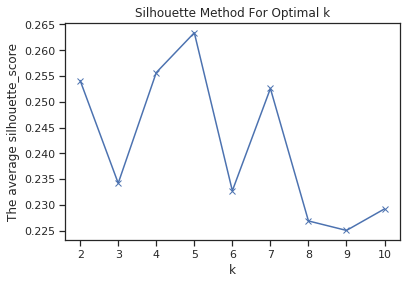

In [56]:
plt.plot(range_n_clusters, ss, 'bx-')
plt.xlabel('k')
plt.ylabel('The average silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [0]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.25412059531932735
For n_clusters = 3 The average silhouette_score is : 0.23418998429307325
For n_clusters = 4 The average silhouette_score is : 0.2556691422997715
For n_clusters = 5 The average silhouette_score is : 0.2538351521968686
For n_clusters = 6 The average silhouette_score is : 0.23263395566448725
For n_clusters = 7 The average silhouette_score is : 0.2525487493972501
For n_clusters = 8 The average silhouette_score is : 0.24912074182160907
For n_clusters = 9 The average silhouette_score is : 0.22507705322921281
For n_clusters = 10 The average silhouette_score is : 0.2226011656110712


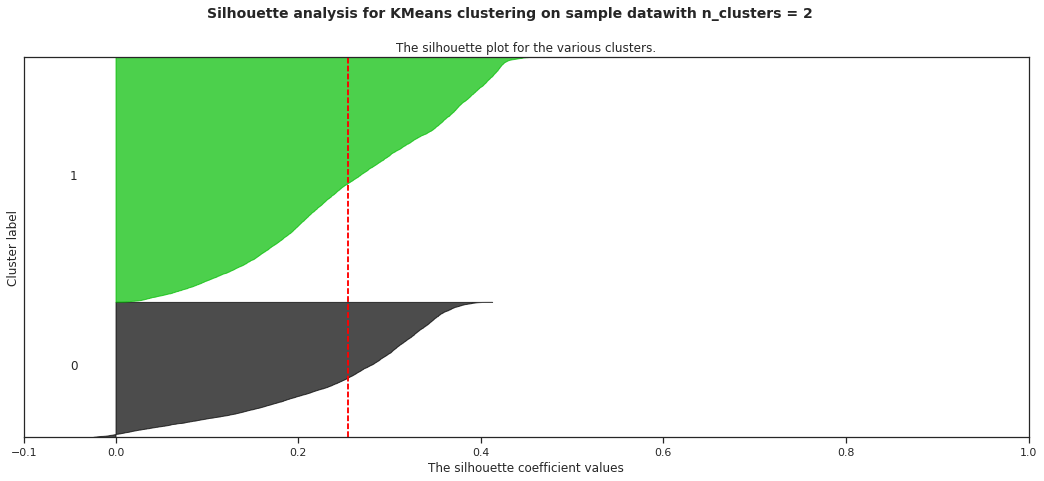

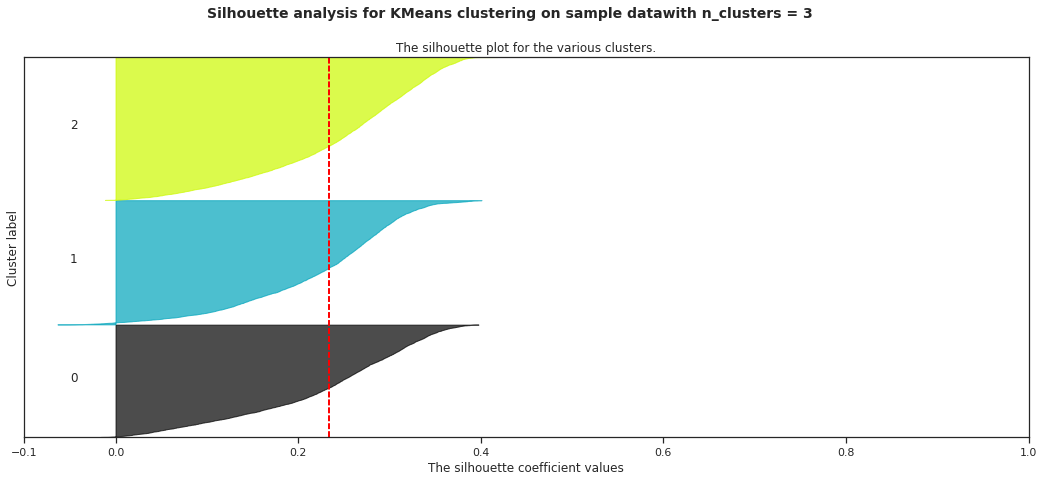

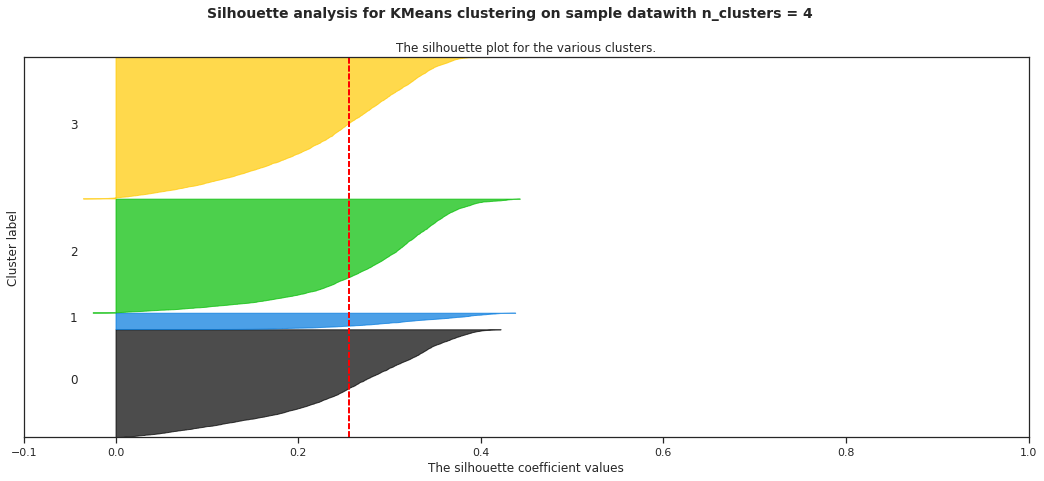

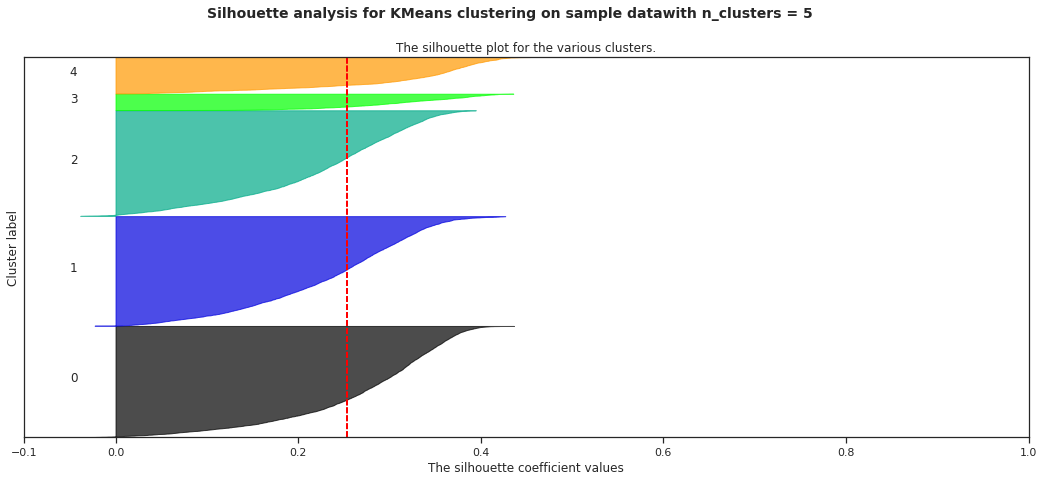

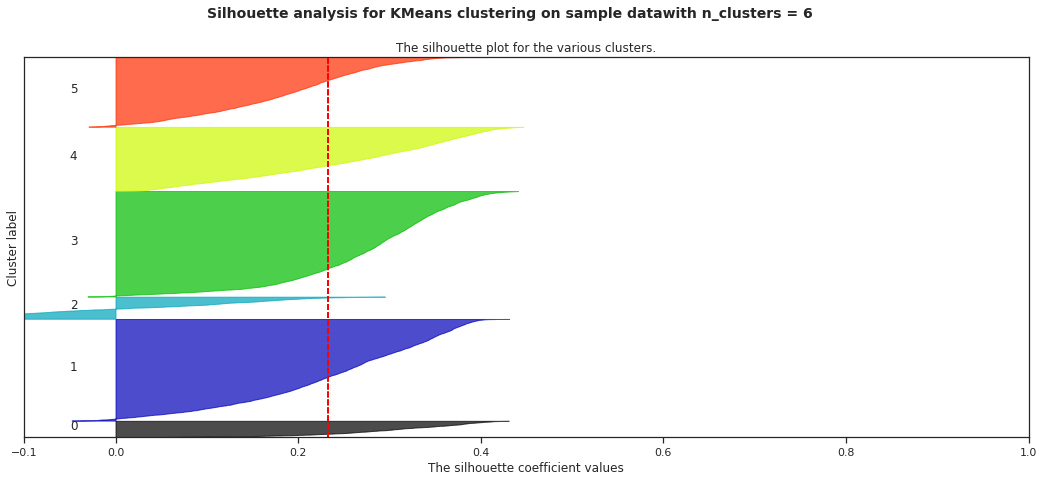

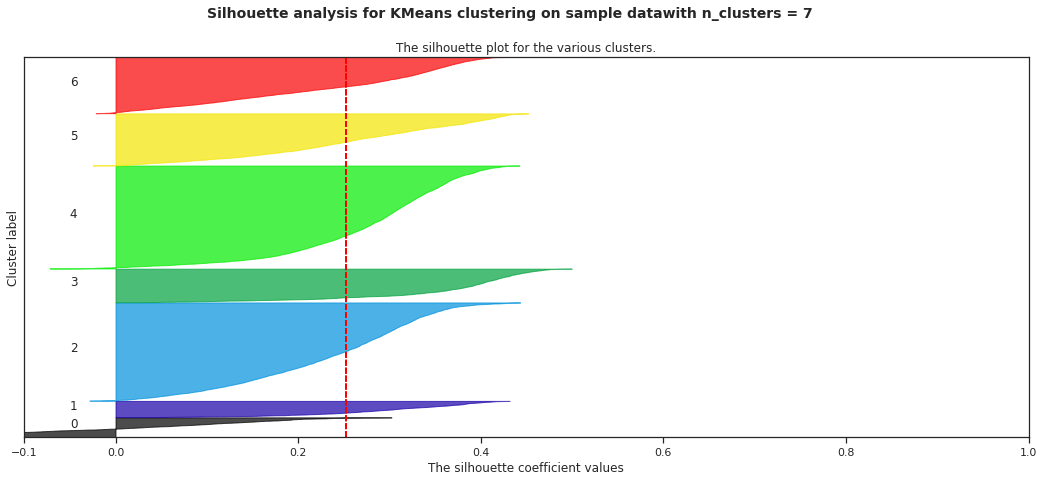

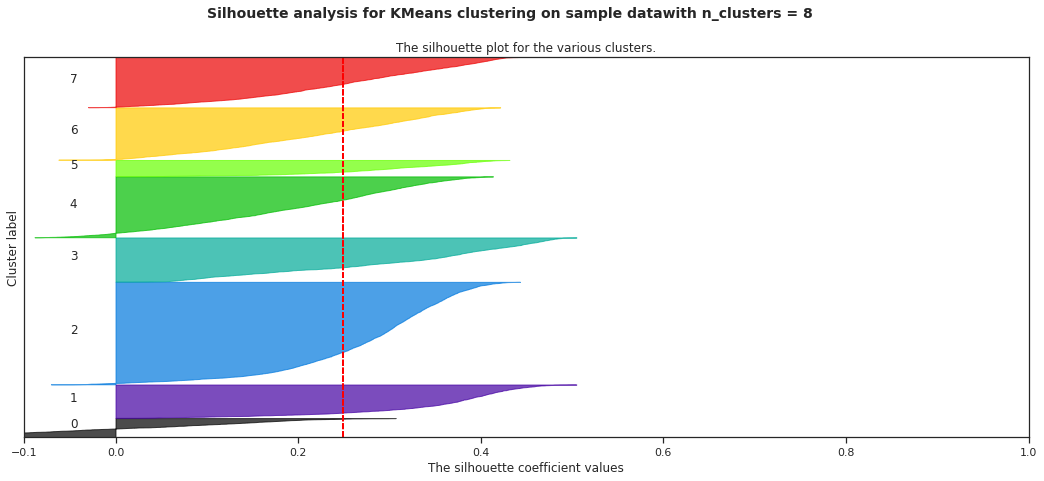

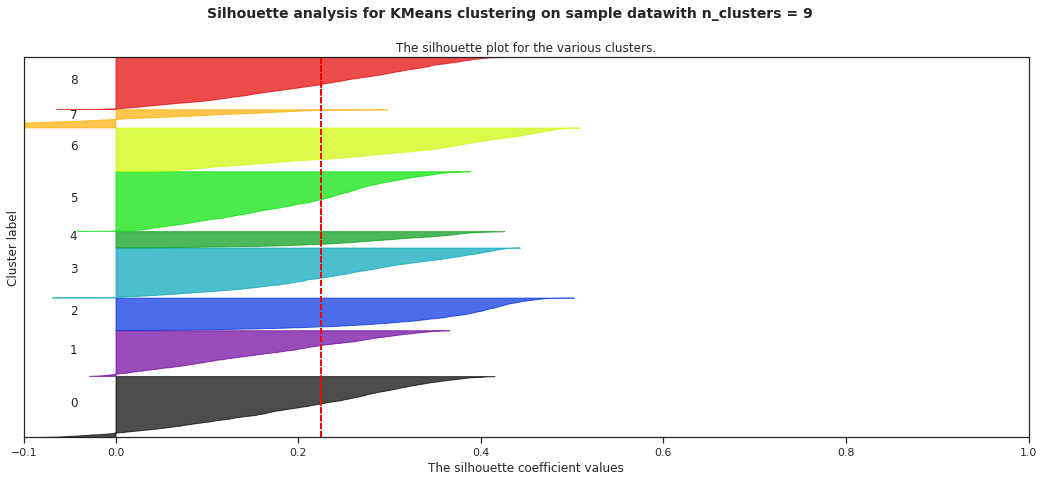

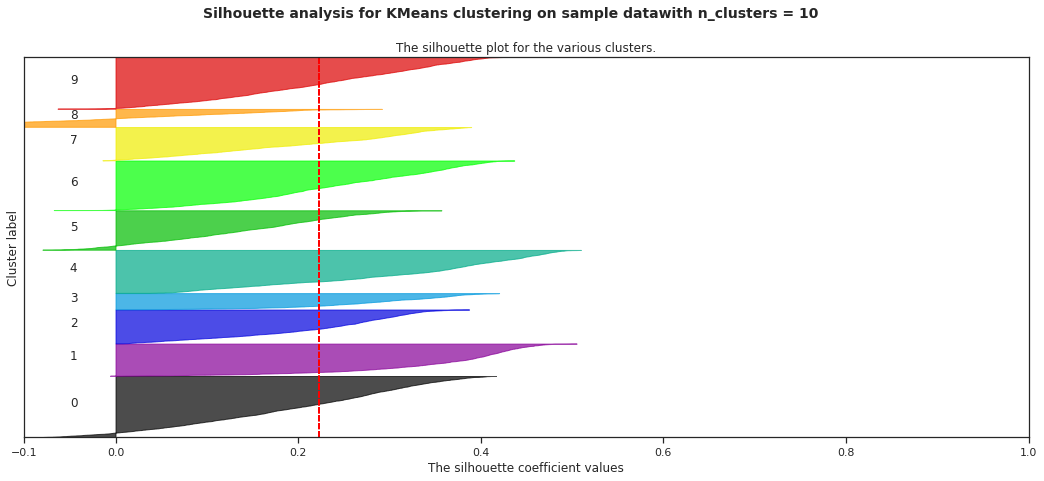

In [58]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
 
for n_clusters in range_n_clusters:
  fig, ax1 = plt.subplots()
  fig.set_size_inches(18,7)
 
  ax1.set_xlim([-0.1,1])
 
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
  clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
  cluster_labels = clusterer.fit_predict(X)
 
  silhouette_avg = silhouette_score(X, cluster_labels)
 
  print("For n_clusters =" , n_clusters,
        "The average silhouette_score is :", silhouette_avg)
 
  #Izračunavanje skora za svaki uzorak
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
 
  y_lower = 10
 
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
 
    ith_cluster_silhouette_values = \
      sample_silhouette_values[cluster_labels == i]
 
    ith_cluster_silhouette_values.sort()
 
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
   
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    centers = clusterer.cluster_centers_
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
   
plt.show()